In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
mkt = pd.read_csv('/content/MKT.csv')

In [ ]:
# Análise descritiva

In [ ]:
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
mkt['youtube'].describe()


count    171.000000
mean     178.021053
std      102.449597
min        0.840000
25%       91.080000
50%      179.760000
75%      262.980000
max      355.680000
Name: youtube, dtype: float64

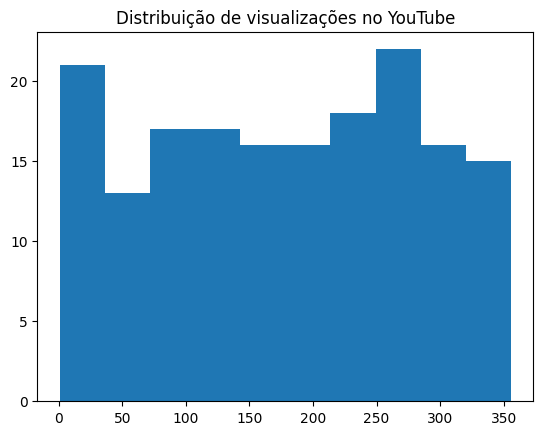

In [ ]:
plt.hist(mkt['youtube'])
plt.title('Distribuição de visualizações no YouTube')
plt.show()

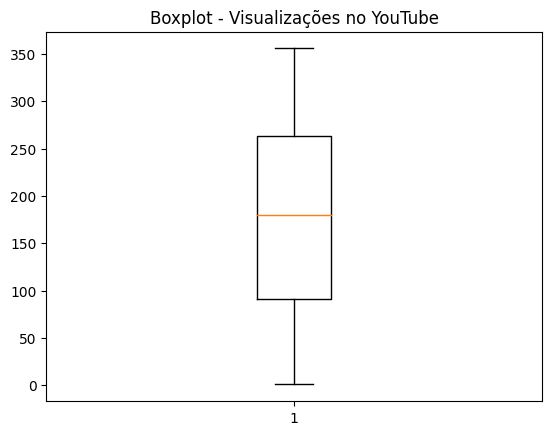

In [ ]:
plt.boxplot(mkt['youtube'])
plt.title('Boxplot - Visualizações no YouTube')
plt.show()

In [ ]:
mkt['facebook'].describe()


count    171.000000
mean      27.671579
std       17.913532
min        0.000000
25%       11.700000
50%       26.760000
75%       43.680000
max       59.520000
Name: facebook, dtype: float64

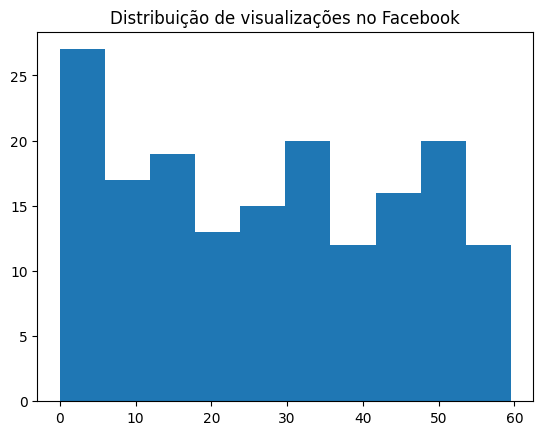

In [ ]:
plt.hist(mkt['facebook'])
plt.title('Distribuição de visualizações no Facebook')
plt.show()

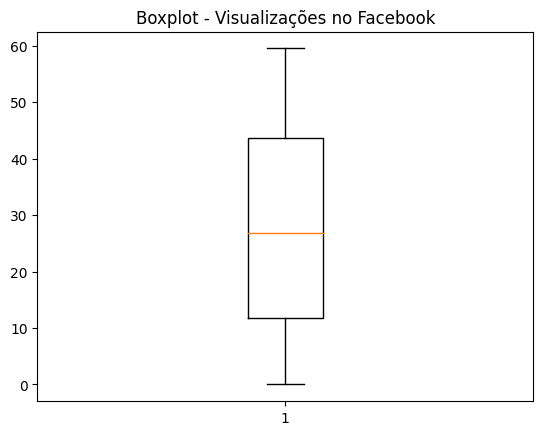

In [ ]:
plt.boxplot(mkt['facebook'])
plt.title('Boxplot - Visualizações no Facebook')
plt.show()

In [ ]:
mkt['newspaper'].describe()

count    171.000000
mean      35.240000
std       24.902918
min        0.360000
25%       13.740000
50%       31.080000
75%       50.880000
max      121.080000
Name: newspaper, dtype: float64

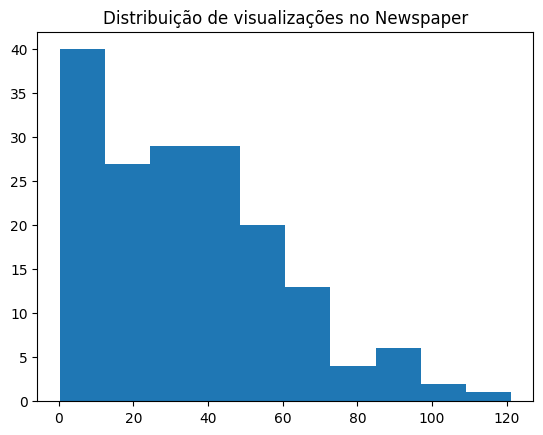

In [ ]:
plt.hist(mkt['newspaper'])
plt.title('Distribuição de visualizações no Newspaper')
plt.show()

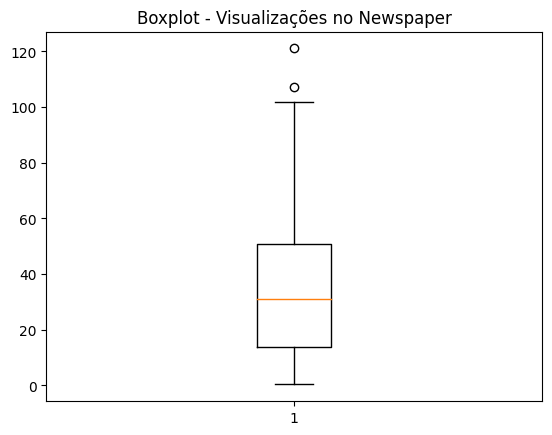

In [ ]:
plt.boxplot(mkt['newspaper'])
plt.title('Boxplot - Visualizações no Newspaper')
plt.show()

In [ ]:
mkt['sales'].describe()

count    171.000000
mean      16.922807
std        6.314608
min        1.920000
25%       12.540000
50%       15.480000
75%       20.820000
max       32.400000
Name: sales, dtype: float64

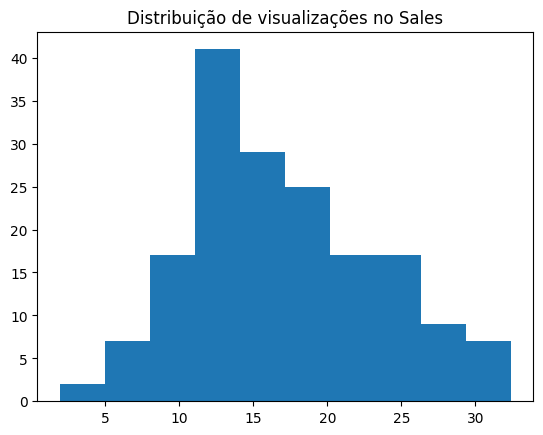

In [ ]:
plt.hist(mkt['sales'])
plt.title('Distribuição de visualizações no Sales')
plt.show()

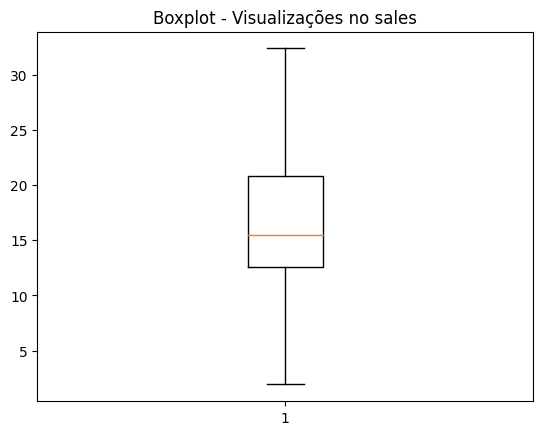

In [ ]:
plt.boxplot(mkt['sales'])
plt.title('Boxplot - Visualizações no sales')
plt.show()

In [ ]:
# Análise exploratória

In [ ]:
from scipy import stats

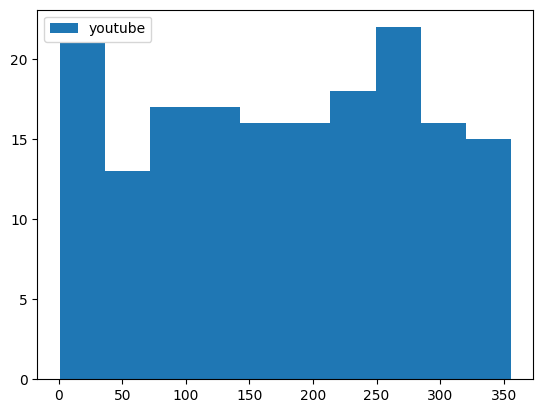

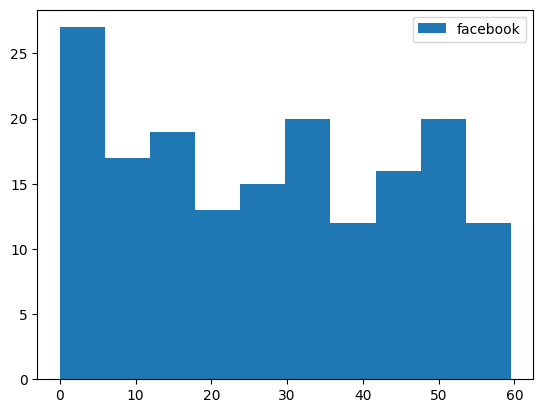

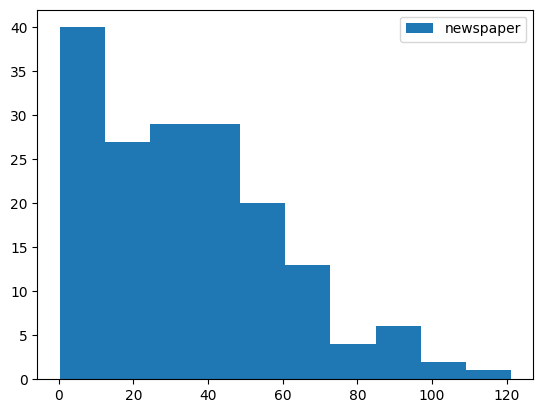

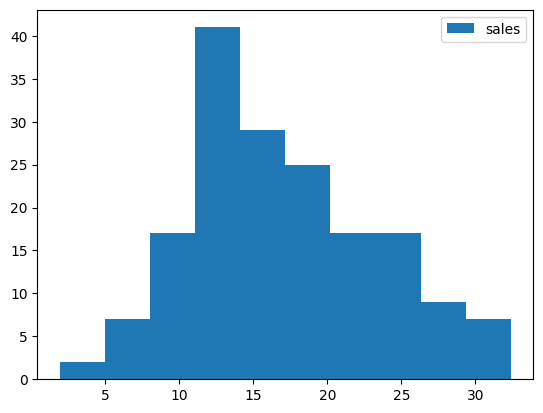

In [ ]:
for col in mkt.select_dtypes(include=['number']):
    plt.hist(mkt[col], label=col)
    plt.legend()
    plt.show()

<ipython-input-23-a0bf381d0c7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y=mkt[col], palette="Set3")


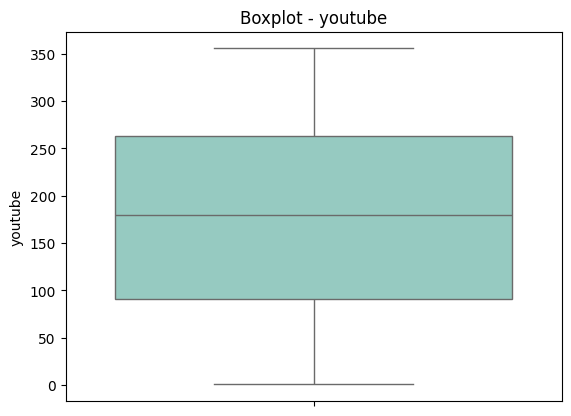

<ipython-input-23-a0bf381d0c7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y=mkt[col], palette="Set3")


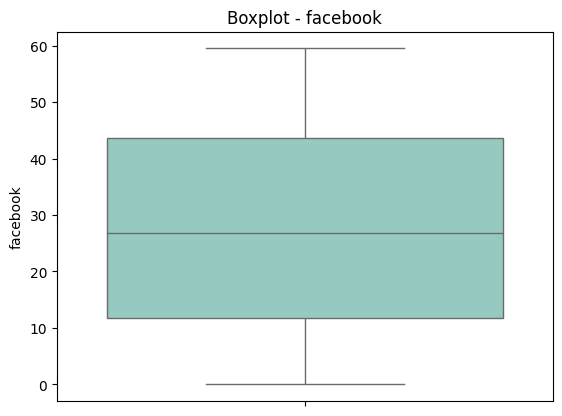

<ipython-input-23-a0bf381d0c7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y=mkt[col], palette="Set3")


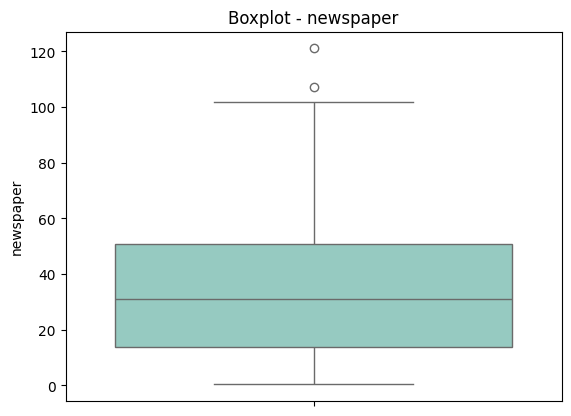

<ipython-input-23-a0bf381d0c7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y=mkt[col], palette="Set3")


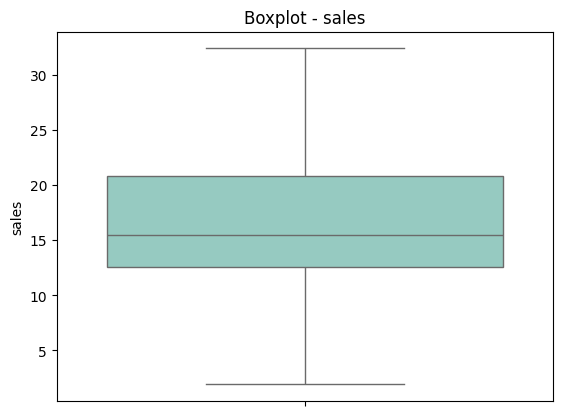

In [ ]:
for col in mkt.select_dtypes(include=['number']):
    sb.boxplot(y=mkt[col], palette="Set3")
    plt.title(f"Boxplot - {col}")
    plt.show()

In [ ]:
def remove_outliers(mkt, col):
    mkt = mkt[~mkt[col].between(mkt[col].quantile(0.025), mkt[col].quantile(0.975))]
    return mkt

mkt = remove_outliers(mkt, 'sales')

In [ ]:
# modelagem

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = mkt[["youtube", "facebook", "newspaper"]]
y = mkt["sales"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
r2_train = r2_score(y_train, y_pred_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)

In [ ]:
print(f"R² no conjunto de treino: {r2_train}")
print(f"MSE no conjunto de treino: {mse_train}")

R² no conjunto de treino: 0.9996590185108937
MSE no conjunto de treino: 0.05343439080227382


In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print(f"R² médio por validação cruzada: {scores.mean()}")

R² médio por validação cruzada: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#Calculando a predição

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

In [ ]:
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [ ]:
valor_youtube = 178  # valor médio
valor_facebook = 35  #  valor médio
valor_newspaper = 27  #  valor médio

In [ ]:
novo_investimento = pd.DataFrame({
    "youtube": [valor_youtube],
    "facebook": [valor_facebook],
    "newspaper": [valor_newspaper]
})

In [ ]:
previsao_venda = model.predict(novo_investimento)

print(f"R² no conjunto de treino: {r2_train}")
print(f"MSE no conjunto de treino: {mse_train}")
print(f"R² no conjunto de teste: {r2_test}")
print(f"MSE no conjunto de teste: {mse_test}")
print(f"Previsão de venda para o novo investimento: {previsao_venda[0]}")

R² no conjunto de treino: 0.9996590185108937
MSE no conjunto de treino: 0.05343439080227382
R² no conjunto de teste: 0.8933700164366996
MSE no conjunto de teste: 18.075957465644123
Previsão de venda para o novo investimento: 15.988705744632465
